In [24]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os
from sys import platform
from importlib import reload
import sys
import weibull
sys.path.append('../../..')

import stlstuff as sls
import imagestuff as ims
import statstuff as sts
import retrievestuff as rs

In [25]:
%matplotlib notebook

In [26]:
def Weibull(Z2,sigma2W,etaW):
    # Getting the Weibull distribution
    rhoW = etaW/(sigma2W)*(Z2/sigma2W)**(etaW-1)*np.exp(-(Z2/sigma2W)**etaW)
    return rhoW

In [27]:
# Loading in the compressed data
Flattenedfilename = 'Segments1_compr_flat_filt.npz'; print(Flattenedfilename)
Roughnessfilename = Flattenedfilename[0:-4]+'_roughness.jpg'; print(Roughnessfilename)
flattenedfile = np.load(Flattenedfilename)
xgridtot = flattenedfile['xgridtot']
ygridtot = flattenedfile['ygridtot']
zgridtot = flattenedfile['zgridtot']
nsegments = (len(xgridtot)); print(nsegments)

# This folder
cwd = os.getcwd(); i = cwd.index('crystals'); case_and_folder = cwd[i+9:]; print(case_and_folder)

Segments1_compr_flat_filt.npz
Segments1_compr_flat_filt_roughness.jpg
12
2019-08-02/case1.1


In [28]:
# Histogram accumulation
countslist = []
accumlist = [] # all
if len(accumlist)==0:
    accumlist = [i for i in range(nsegments)]
plotthisone = accumlist
print('Accumulating segments', accumlist)
print('Plotting segments', plotthisone)

# Parameters for binning
Z2minforhist = 0
Z2maxforhist = .12
print('Z2 ranging from', Z2minforhist, 'to', Z2maxforhist)
nbins_max = 10
print('Max number of bins specified is', nbins_max)
Ntot = np.size(zgridtot[0]) # Just using the first one for a size estimate
nbins_sturges = int(1+3.3*np.log10(Ntot)); print('Sturges rule says maxbins =', nbins_sturges)
nbins = np.min([nbins_max,nbins_sturges]); print('Using nbins = ', nbins)
Z2bins = np.linspace(Z2minforhist,Z2maxforhist,nbins); #print(Z2bins)
Z2theory = np.linspace(Z2bins[1],Z2bins[-1]) # This is for Weibull plots
levels = 3; print('Using levels =', levels, 'for uncertainty analysis')


Accumulating segments [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Plotting segments [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Z2 ranging from 0 to 0.12
Max number of bins specified is 10
Sturges rule says maxbins = 11
Using nbins =  10
Using levels = 3 for uncertainty analysis


Original =  1484
4 0 371 [139  72  68  30  19  17   8   4   3]
4 1 371 [128  84  55  28  31  13  11   5   3]
4 2 371 [128  87  57  32  23  13   8   5   8]
4 3 371 [130  88  53  35  25  16   7   6   4]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03172471674698366
statsigma =  0.1781143361635544


<IPython.core.display.Javascript object>


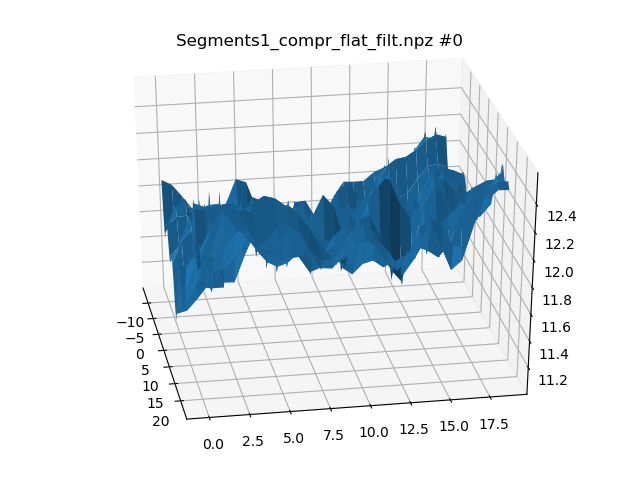

std dev of height =  0.2738767972871385
integral =  0.010824670824670824


<IPython.core.display.Javascript object>


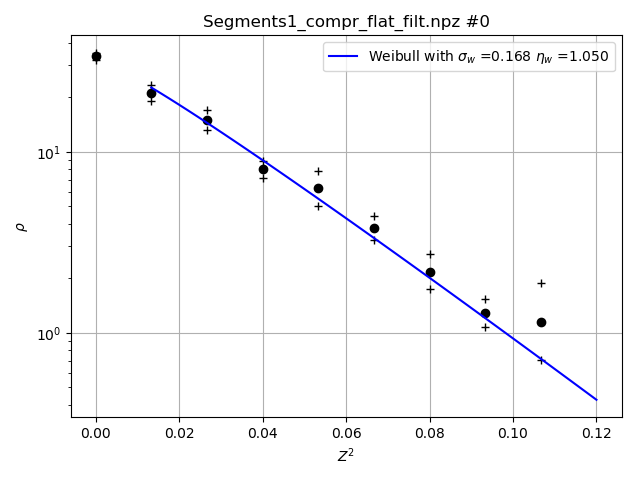

[32.06803872 19.14236918 13.10415426  7.17796299  5.03792998  3.23382278
  1.74837809  1.07028647  0.70439201]
Original =  1484
4 0 371 [105  87  44  36  29  18  16  10   7]
4 1 371 [120  86  42  30  29  19  14   7   4]
4 2 371 [118  81  49  41  20  14   8  13  12]
4 3 371 [119  80  44  29  24  24  16   9   9]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03813593818032766
statsigma =  0.1952842496985552


<IPython.core.display.Javascript object>


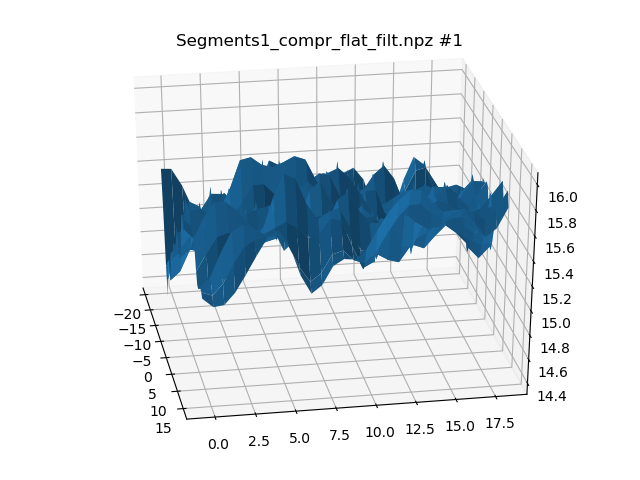

std dev of height =  0.2820738615818228
integral =  0.011002594951639535


<IPython.core.display.Javascript object>


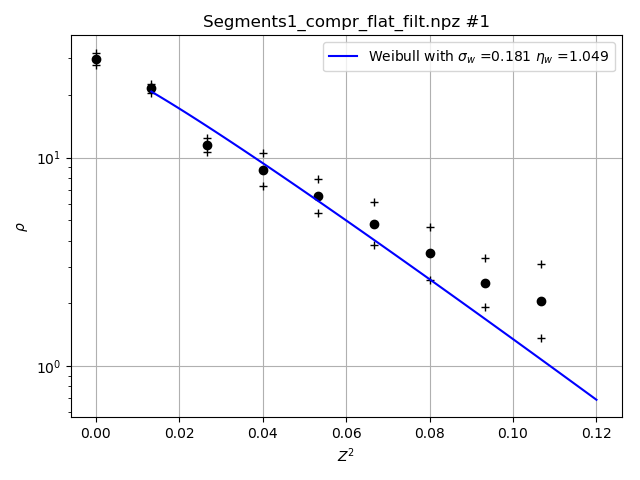

[27.68602363 20.44968232 10.65865473  7.3024698   5.44243429  3.81744278
  2.59761469  1.91748239  1.36682178]
Original =  1484
4 0 371 [110  79  58  36  35  19   8   8   8]
4 1 371 [106  86  63  41  26  11  13   3   2]
4 2 371 [125  84  48  39  25  21   8  11   4]
4 3 371 [119  78  62  37  32  15  13   8   3]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.033858192498279496
statsigma =  0.18400595777930534


<IPython.core.display.Javascript object>


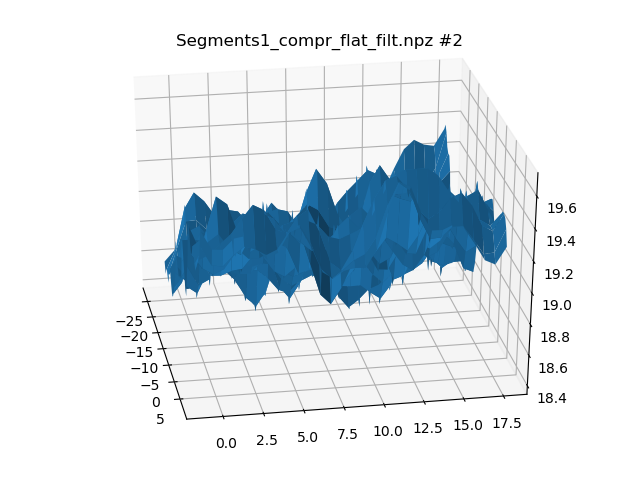

std dev of height =  0.28076840864902464
integral =  0.011131117266851337


<IPython.core.display.Javascript object>


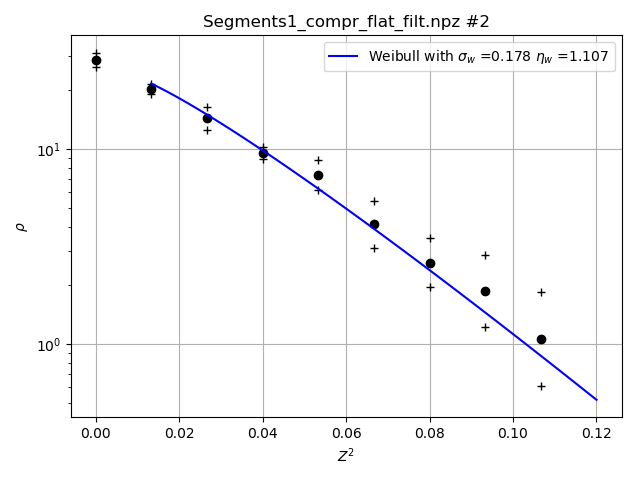

[26.2574782  19.25083448 12.57807216  8.89868906  6.14108772  3.10339433
  1.96389804  1.21858582  0.60646621]
Original =  1484
4 0 371 [112  75  57  40  24  21  11  10   9]
4 1 371 [105  86  51  38  19  19  17   8   4]
4 2 371 [109  65  58  42  33  13  15  12   4]
4 3 371 [127  78  40  33  30  19   6  11   9]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03965200069990553
statsigma =  0.19912810123110583


<IPython.core.display.Javascript object>


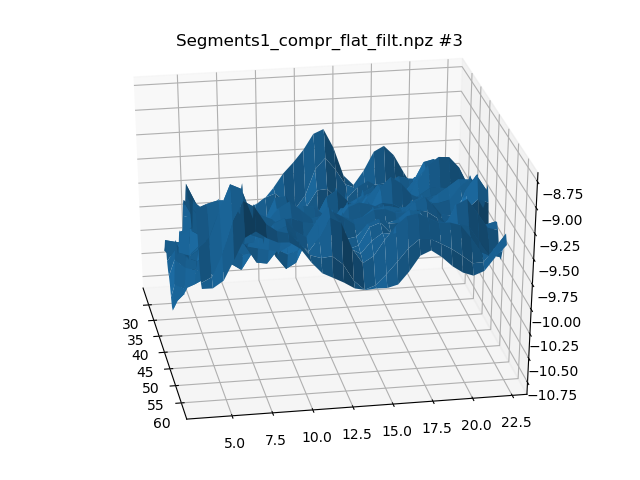

std dev of height =  0.3472094280849393
integral =  0.011068557919621747


<IPython.core.display.Javascript object>


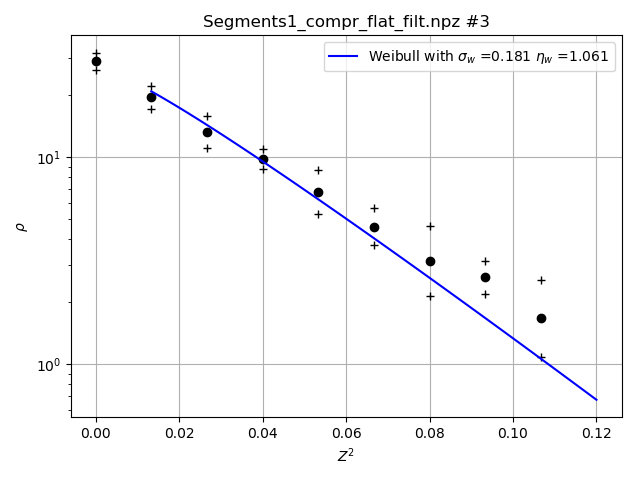

[26.34036361 17.12728355 11.06435462  8.74225313  5.29250145  3.74656803
  2.1262893   2.18866439  1.08606835]
Original =  1484
4 0 371 [132  97  54  37  18  10   5   3   6]
4 1 371 [128  94  50  30  21  14   9   6   3]
4 2 371 [130  89  56  19  16  18  12   9   4]
4 3 371 [136  84  46  39  26  12   9   7   2]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03165043759142769
statsigma =  0.17790569859177555


<IPython.core.display.Javascript object>


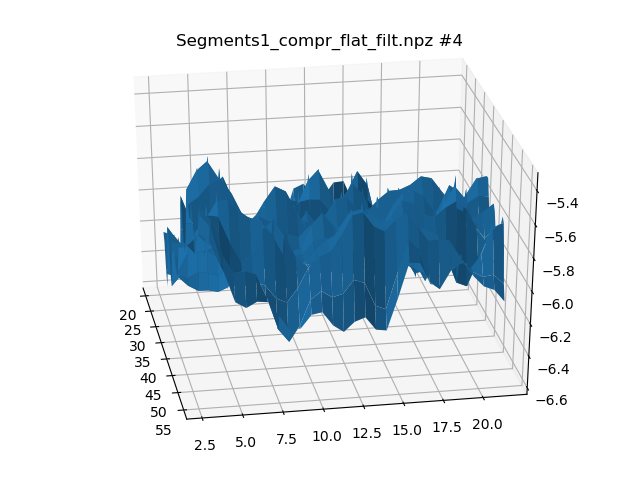

std dev of height =  0.25685839247601294
integral =  0.01081295131609597


<IPython.core.display.Javascript object>


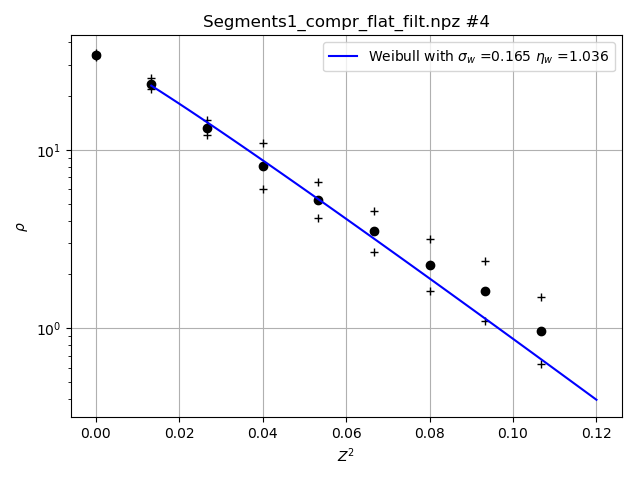

[32.96456675 21.87274607 12.0642663   5.99516398  4.16049632  2.67591705
  1.62188445  1.0910183   0.62642697]
Original =  1484
4 0 371 [132  73  61  31  26  18  11   3   5]
4 1 371 [132  93  47  31  19  21  12   3   4]
4 2 371 [139  74  61  37  22  12   6   3   3]
4 3 371 [125 100  40  33  25  13  12   2   8]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03251884794806656
statsigma =  0.1803298309988299


<IPython.core.display.Javascript object>


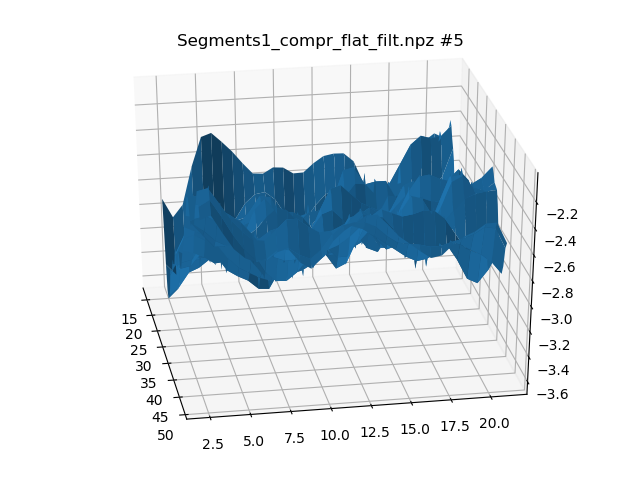

std dev of height =  0.264147213204112
integral =  0.010790999768035258


<IPython.core.display.Javascript object>


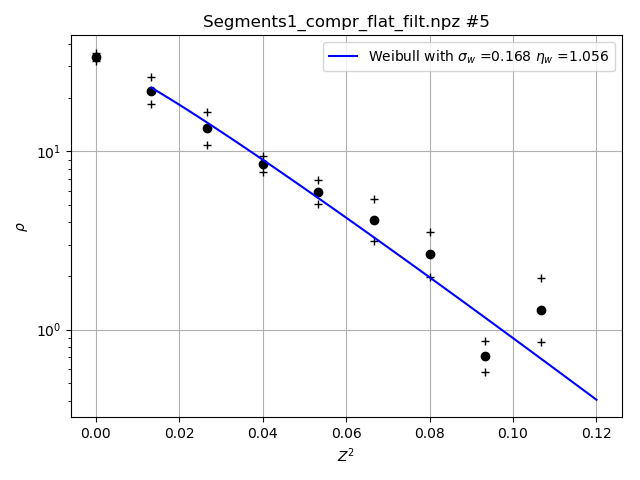

[32.36508424 18.39117455 10.85542792  7.71725451  5.09135271  3.12957642
  1.97773702  0.58212628  0.84885241]
Original =  1484
4 0 371 [131  79  60  34  16  18  11   7   6]
4 1 371 [129  90  47  30  32  15   6  11   1]
4 2 371 [121  73  63  41  28  20   8   6   4]
4 3 371 [110  85  60  50  23  19  10   4   2]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.032169197238718035
statsigma =  0.17935773537463623


<IPython.core.display.Javascript object>


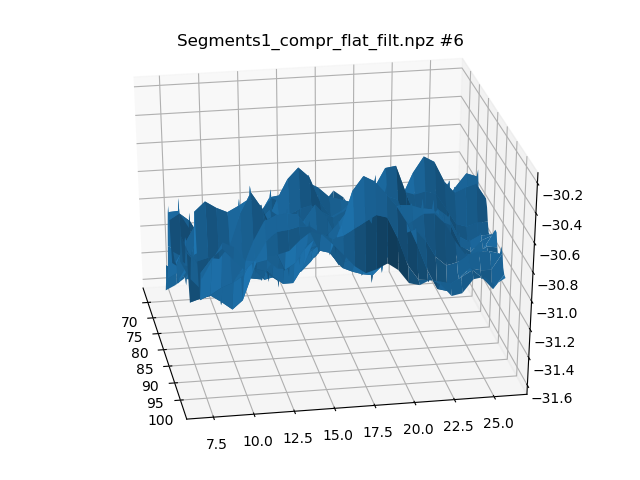

std dev of height =  0.2979264477228298
integral =  0.011016091954022988


<IPython.core.display.Javascript object>


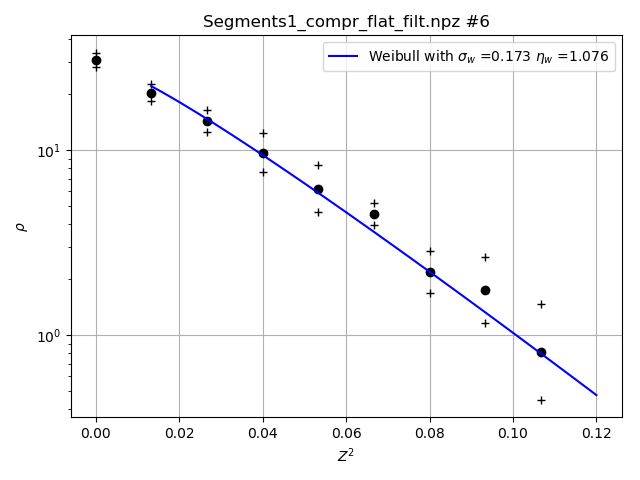

[28.11329358 18.47088454 12.5283174   7.62807499  4.64230846  3.93915263
  1.67947972  1.16425815  0.44711453]
Original =  1484
4 0 371 [127  71  57  31  22  17  10   8   6]
4 1 371 [122  87  44  43  17  14   7   9   6]
4 2 371 [133  74  51  29  25  15   6   7   4]
4 3 371 [119  70  62  37  22  18  10   6   5]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03906926668581592
statsigma =  0.1976594715307514


<IPython.core.display.Javascript object>


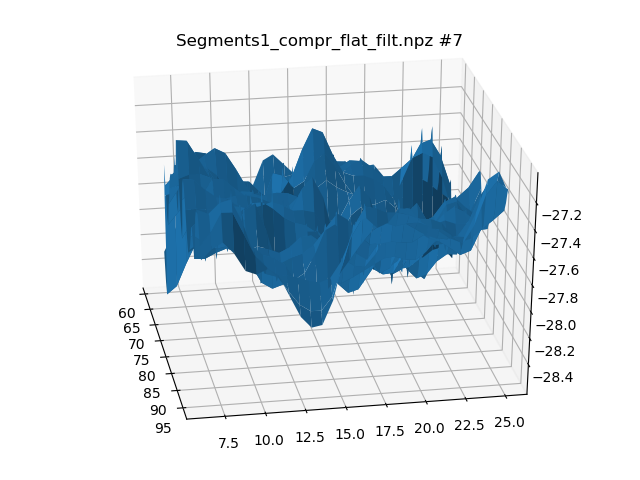

std dev of height =  0.2569244282242548
integral =  0.010831536065180922


<IPython.core.display.Javascript object>


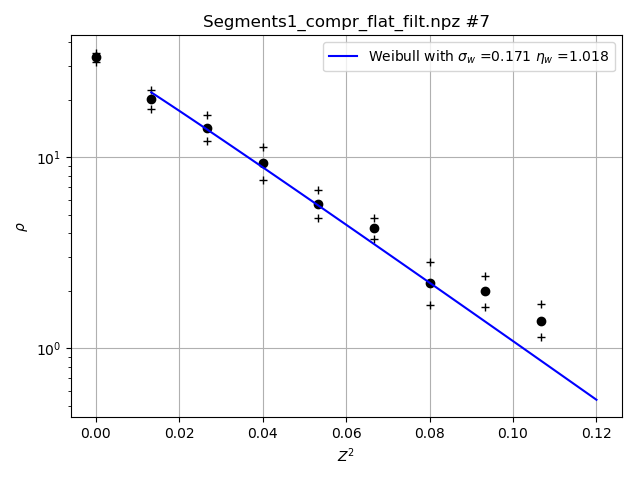

[31.40423015 17.81638882 12.09277198  7.63365484  4.81498325  3.7353506
  1.6842742   1.64974551  1.14316777]
Original =  1484
4 0 371 [125  87  59  30  23  10  12   4   2]
4 1 371 [121  87  50  36  25  18   9   4   5]
4 2 371 [136  79  55  38  10  21   8   2   2]
4 3 371 [134  74  64  35  28   9   4   3   4]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03679107291040958
statsigma =  0.19180999168554694


<IPython.core.display.Javascript object>


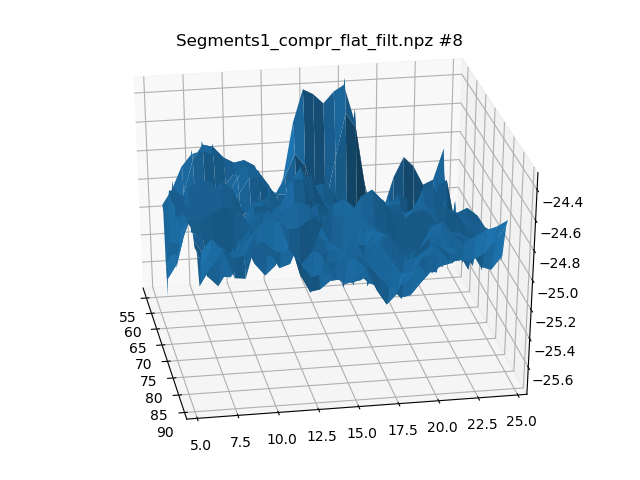

std dev of height =  0.271057527726393
integral =  0.010837461665487144


<IPython.core.display.Javascript object>


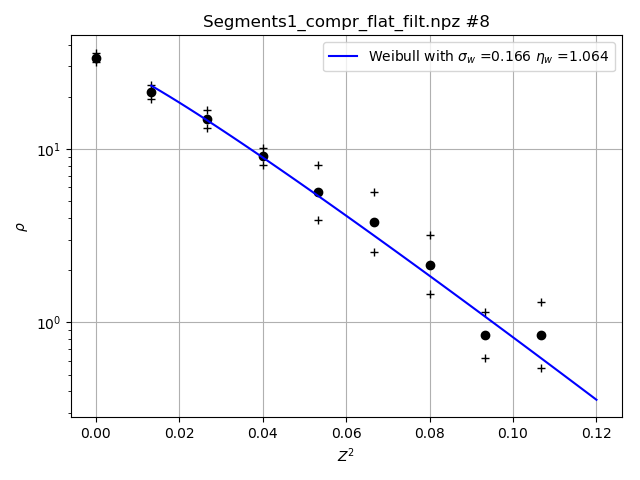

[31.5869739  19.51788819 13.23025661  8.12084753  3.88965562  2.54109423
  1.45461339  0.626903    0.54598065]
Original =  1484
4 0 371 [125  82  52  36  20  24  13   6   0]
4 1 371 [131  78  55  36  26  15  13   7   2]
4 2 371 [127  92  61  33  20  13  12   5   5]
4 3 371 [132  88  56  36  26  10   5   6   2]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.031294838913478736
statsigma =  0.17690347343531368


<IPython.core.display.Javascript object>


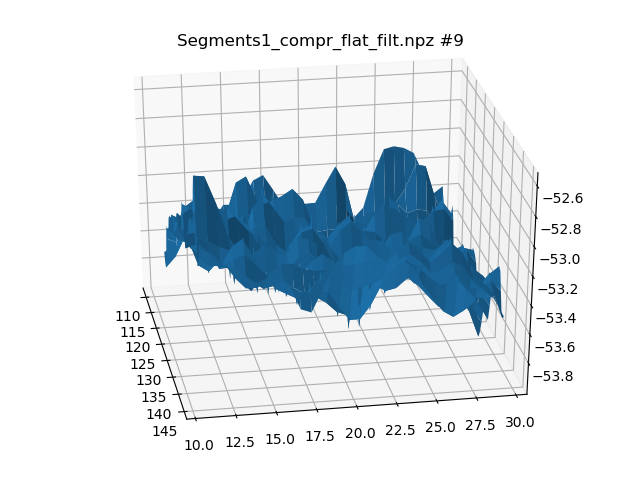

std dev of height =  0.20954143055850608
integral =  0.010924137931034483


<IPython.core.display.Javascript object>


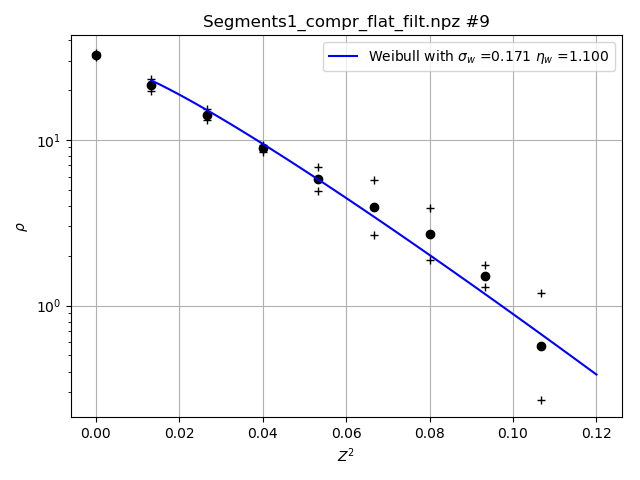

[31.53955841 19.72942983 13.08992929  8.46828628  4.91763272  2.66716051
  1.89579052  1.30212     0.27036405]
Original =  1484
4 0 371 [134  86  58  31  14  15  12   5   4]
4 1 371 [144  99  32  32  18  16   8   7   9]
4 2 371 [141  67  61  40  25   8  12   5   1]
4 3 371 [128  90  44  41  25  11   6   9   4]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03144278632492968
statsigma =  0.17732113896805896


/Users/nesh/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


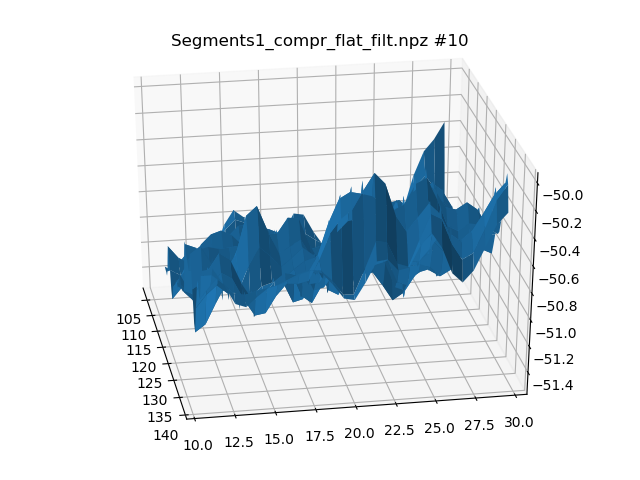

std dev of height =  0.2944191968800242
integral =  0.010721220527045768


<IPython.core.display.Javascript object>


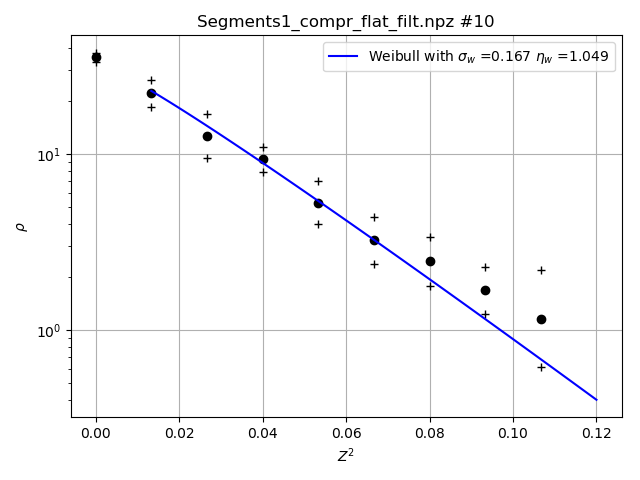

[33.2802542  18.59704243  9.48016816  7.92984318  4.01993777  2.38584521
  1.78157491  1.24191133  0.61730901]
Original =  1484
4 0 371 [137  88  44  35  20  12  11   7   3]
4 1 371 [129  87  45  32  25  23  10   3   4]
4 2 371 [133  80  44  28  26  17   9   3   6]
4 3 371 [134  76  54  38  12  18   6   2   7]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03650519865267891
statsigma =  0.19106333675689563


<IPython.core.display.Javascript object>


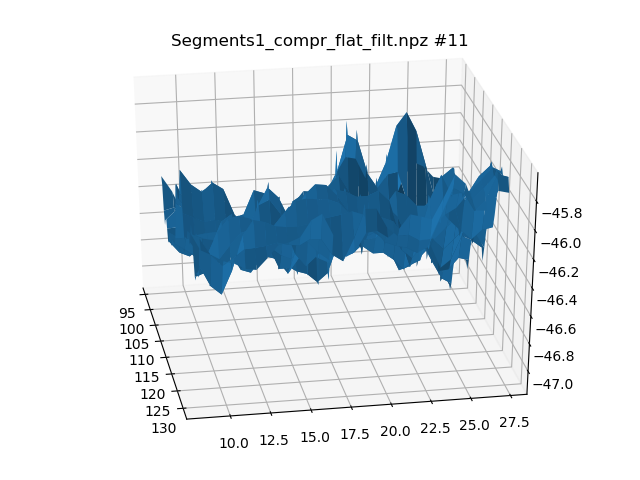

std dev of height =  0.2931669031912671
integral =  0.01071496212121212


<IPython.core.display.Javascript object>


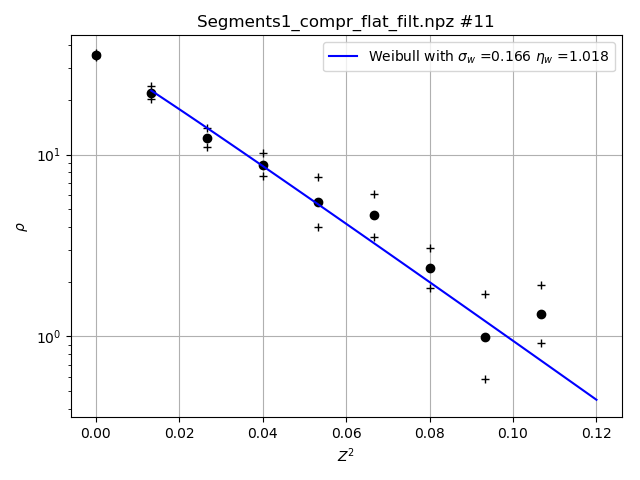

[34.30651861 20.25182012 11.01894812  7.63620629  4.0139287   3.54246671
  1.85183086  0.58113821  0.92125013]


In [29]:
# Arrays for accumulating 
counts_list = []
meanZ2_list = []
Z2flat_list = []

# Looping over segments
for isegment in range(nsegments):

    # Pull out the next segment
    sollast = zgridtot[isegment]
    xgrid = xgridtot[isegment] 
    ygrid = ygridtot[isegment]
    Ny, Nx = np.shape(sollast); #print(sollast.shape)
    Ntot = np.size(sollast)
    dx = xgrid[0,1]-xgrid[0,0]; #print('dx =', dx)
    dy = ygrid[1,0]-ygrid[0,0]; #print('dy =', dy)

    # Get the probability distribution in Z2
    counts, bins, meanZ2, Z2flat, error = rs.getrhoofz2(sollast,dx,dy,Z2bins=Z2bins,levels=levels)
    print('meanZ2 = ', meanZ2)
    print('statsigma = ', np.sqrt(meanZ2))

    # Plot if we want
    if isegment in plotthisone:
        
        # Graph the surface
        fig1 = plt.figure()
        ax = fig1.add_subplot(111, projection='3d')
        ax.plot_surface(xgrid, ygrid, sollast)
        title = Flattenedfilename+' #'+str(isegment)
        ax.set_title(title)
        ax.view_init(30, -10)
        
        # Normalize the distribution function, report stats
        integral_rho = np.trapz(counts, bins)
        print ('std dev of height = ', np.std(sollast))
        print('integral = ', integral_rho)
        counts = counts/integral_rho
        error = error/integral_rho

        # Graph the probability
        plt.figure()
        plt.semilogy(bins, counts, 'ok')
        countsplus = counts+error; #print(countsplus)
        countsminus = counts**2/countsplus; print(countsminus)
        plt.semilogy(bins, countsplus, '+k')
        plt.semilogy(bins, countsminus,'+k')
        plt.title(title)
        plt.xlabel(r'$Z^{2}$')
        plt.ylabel(r'$\rho$')
        plt.grid(True)
        
        # Attempt a best-fit
        ikeep = np.argwhere(Z2flat < Z2maxforhist)
        Z2flat_new = np.squeeze(Z2flat[ikeep])
        analysis = weibull.Analysis(Z2flat_new)
        analysis.fit(method='mle')
        etaW = analysis.beta
        sigma2W = analysis.eta
        sigmaW = np.sqrt(sigma2W)
        
        # Graph the best-fit probability
        myWeibull = Weibull(Z2theory,sigma2W,etaW)
        plt.semilogy(Z2theory, myWeibull, 'b',label = 'Weibull with $\sigma_w$ =' + str(sigmaW)[0:5] + ' $\eta_w$ =' + str(etaW)[0:5])
        plt.legend()
        
    # Accumulate if we want
    if isegment in accumlist:
        counts_list.append(counts)
        meanZ2_list.append(meanZ2)
        Z2flat_list.append(Z2flat)

Original =  1484
4 0 371 [137  88  44  35  20  12  11   7   3]
4 1 371 [129  87  45  32  25  23  10   3   4]
4 2 371 [133  80  44  28  26  17   9   3   6]
4 3 371 [134  76  54  38  12  18   6   2   7]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03650519865267891
statsigma =  0.19106333675689563
integral =  0.01071496212121212
eta_W =  1.0544723632924713
sigma_W =  0.17165218562300003


/Users/nesh/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


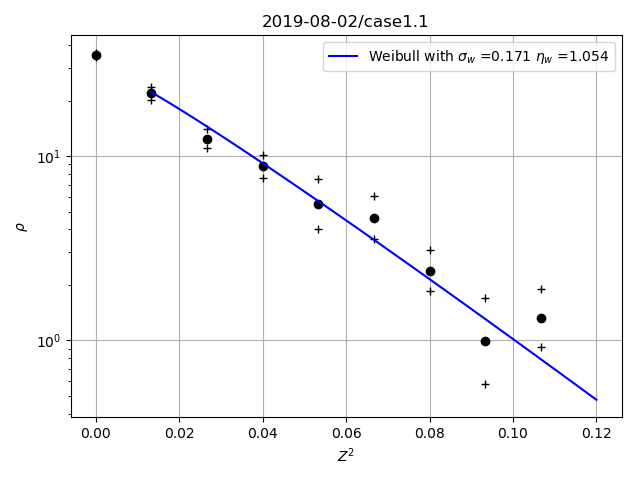

[34.30651861 20.25182012 11.01894812  7.63620629  4.0139287   3.54246671
  1.85183086  0.58113821  0.92125013]


In [30]:
# Sum up the accumulated informaion
# Naccum, Laccum = np.shape(Z2flat_list)
# Z2flat_total = np.reshape(Z2flat_list,Naccum*Laccum,1)
Z2flat_total = []
for i in Z2flat_list:
    for j in i:
        Z2flat_total.append(j)
Z2flat_total = np.array(Z2flat_total)
ikeep = np.argwhere(Z2flat_total < Z2maxforhist)
Z2flat_new = np.squeeze(Z2flat_total[ikeep])
ikeep = np.argwhere(Z2flat_total < Z2maxforhist)
Z2flat_new = np.squeeze(Z2flat_total[ikeep])

# Get the probability distribution in Z2
counts, bins, meanZ2, error = rs.getrhoofz2flat(Z2flat,nbins,Z2bins,levels)
print('meanZ2 = ', meanZ2)
print('statsigma = ', np.sqrt(meanZ2))

# Normalize the distribution function
integral_rho = np.trapz(counts, bins)
print('integral = ', integral_rho)
counts = counts/integral_rho
error = error/integral_rho

# Get the best Weibull parameters
analysis = weibull.Analysis(Z2flat_new)
analysis.fit(method='mle')
etaW = analysis.beta; print ('eta_W = ',etaW)
sigma2W = analysis.eta
sigmaW = np.sqrt(sigma2W); print ('sigma_W = ',sigmaW)

# Graph the probability
plt.figure()
plt.semilogy(bins, counts, 'ok')
countsplus = counts+error; #print(countsplus)
countsminus = counts**2/countsplus; print(countsminus)
plt.semilogy(bins, countsplus, '+k')
plt.semilogy(bins, countsminus,'+k')
plt.title(case_and_folder)
plt.xlabel(r'$Z^{2}$')
plt.ylabel(r'$\rho$')
plt.grid(True)

# Graph the best-fit probability
myWeibull = Weibull(Z2theory,sigma2W,etaW)
plt.semilogy(Z2theory, myWeibull, 'b',label = 'Weibull with $\sigma_w$ =' + str(sigmaW)[0:5] + ' $\eta_w$ =' + str(etaW)[0:5])
plt.legend()

In [31]:
plt.savefig(Roughnessfilename)